In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime

In [2]:
"""
Generate comprehensive analysis and visualization of serial killer data,
avoiding the 'Possible victims' and 'Years active' columns.
"""
# Create output directories
os.makedirs('data/reports', exist_ok=True)
os.makedirs('data/charts', exist_ok=True)

# Load the data
print("Loading data from CSV...")
try:
    df = pd.read_csv('data/output.csv')
    print(f"Loaded {len(df)} rows with {len(df.columns)} columns")
except Exception as e:
    print(f"Error loading data: {e}")
    exit()

# Overview of the dataset
print("\nGenerating analysis report...")

# Create a timestamp for the report
timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

# Start the report
report = f"""# Serial Killer Data Analysis Report
Generated: {timestamp}

## Dataset Overview
- Total records: {len(df)}
- Total columns: {len(df.columns)}

"""

Loading data from CSV...
Loaded 305 rows with 12 columns

Generating analysis report...


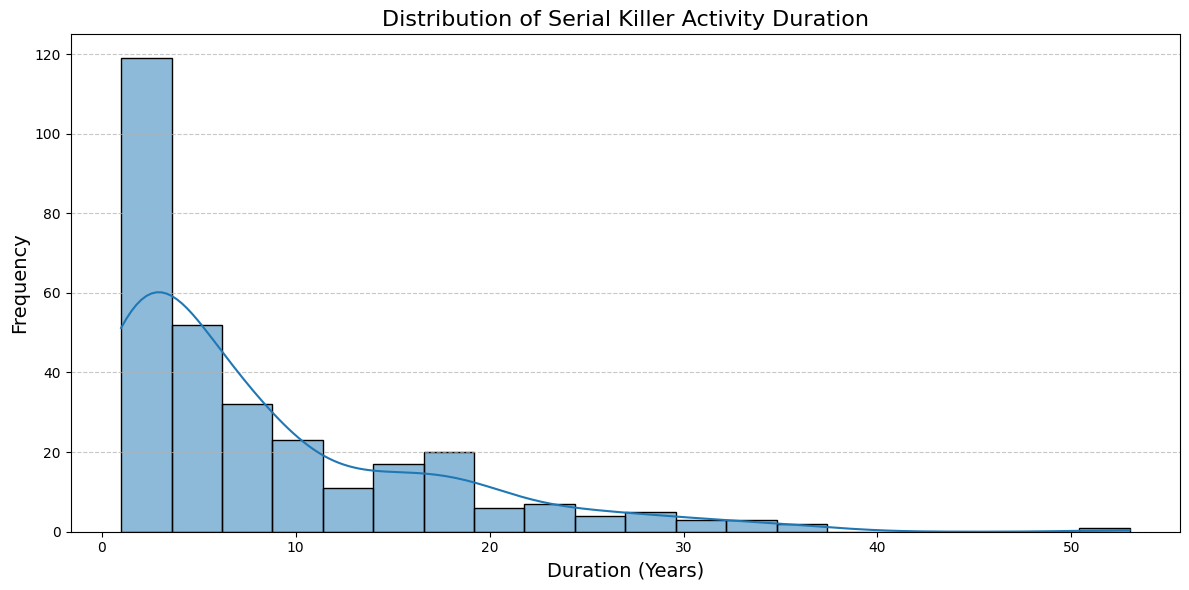

In [ ]:
# 1. TEMPORAL ANALYSIS codes added
report += "\n## Temporal Analysis\n\n"

# Calculate activity period statistics using from_year and to_year
if all(col in df.columns for col in ['from_year', 'to_year']):
    # Basic statistics on time periods
    from_year_stats = df['from_year'].describe().to_dict()
    to_year_stats = df['to_year'].describe().to_dict()

    report += f"### Activity Period Statistics\n"
    report += f"- Earliest recorded activity start: {int(from_year_stats['min'])}\n"
    report += f"- Latest recorded activity start: {int(from_year_stats['max'])}\n"
    report += f"- Earliest recorded activity end: {int(to_year_stats['min'])}\n"
    report += f"- Latest recorded activity end: {int(to_year_stats['max'])}\n"
    report += f"- Median activity start year: {int(from_year_stats['50%'])}\n"
    report += f"- Median activity end year: {int(to_year_stats['50%'])}\n\n"

    # Graph: showcasing the number of active serial killers by decade
    plt.figure(figsize=(14, 7))

    # Created a dataframe with rows for each killer and columns for each decade
    decades = list(range(1800, 2030, 10))
    decade_counts = []

    for decade in decades:
        # Count killers active during this decade
        count = len(df[(df['from_year'] <= decade + 9) & (df['to_year'] >= decade)])
        decade_counts.append(count)

    plt.bar(decades, decade_counts, width=8)
    plt.title('Number of Active Serial Killers by Decade', fontsize=16)
    plt.xlabel('Decade', fontsize=14)
    plt.ylabel('Number of Active Killers', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(decades[::2], rotation=45)  # Show every other decade
    plt.tight_layout()

    plt.close()

    report += f"![Killers by Decade](charts/killers_by_decade.png)\n\n"

    # Graph: Duration distribution
    if 'active_duration' in df.columns:
        plt.figure(figsize=(12, 6))
        sns.histplot(df['active_duration'].dropna(), kde=True, bins=20)
        plt.title('Distribution of Serial Killer Activity Duration', fontsize=16)
        plt.xlabel('Duration (Years)', fontsize=14)
        plt.ylabel('Frequency', fontsize=14)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()
        plt.close()

        report += f"### Activity Duration\n"
        report += f"- Average activity duration: {df['active_duration'].mean():.1f} years\n"
        report += f"- Median activity duration: {df['active_duration'].median():.1f} years\n"
        report += f"- Maximum activity duration: {df['active_duration'].max():.1f} years\n"
        report += f"![Activity Duration](charts/activity_duration_distribution.png)\n\n"


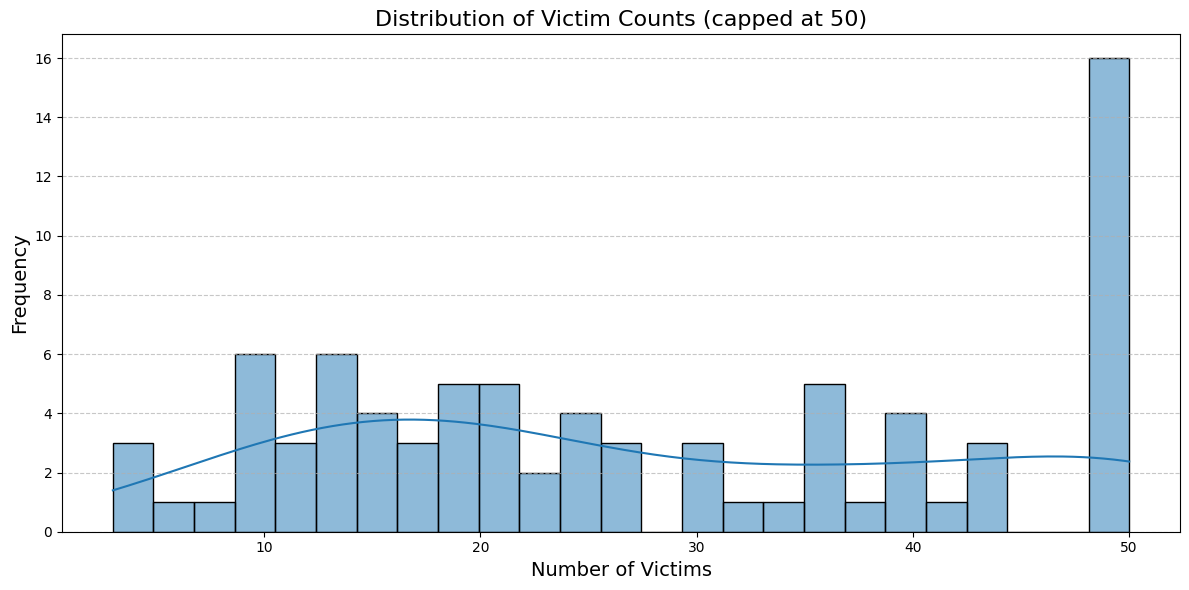

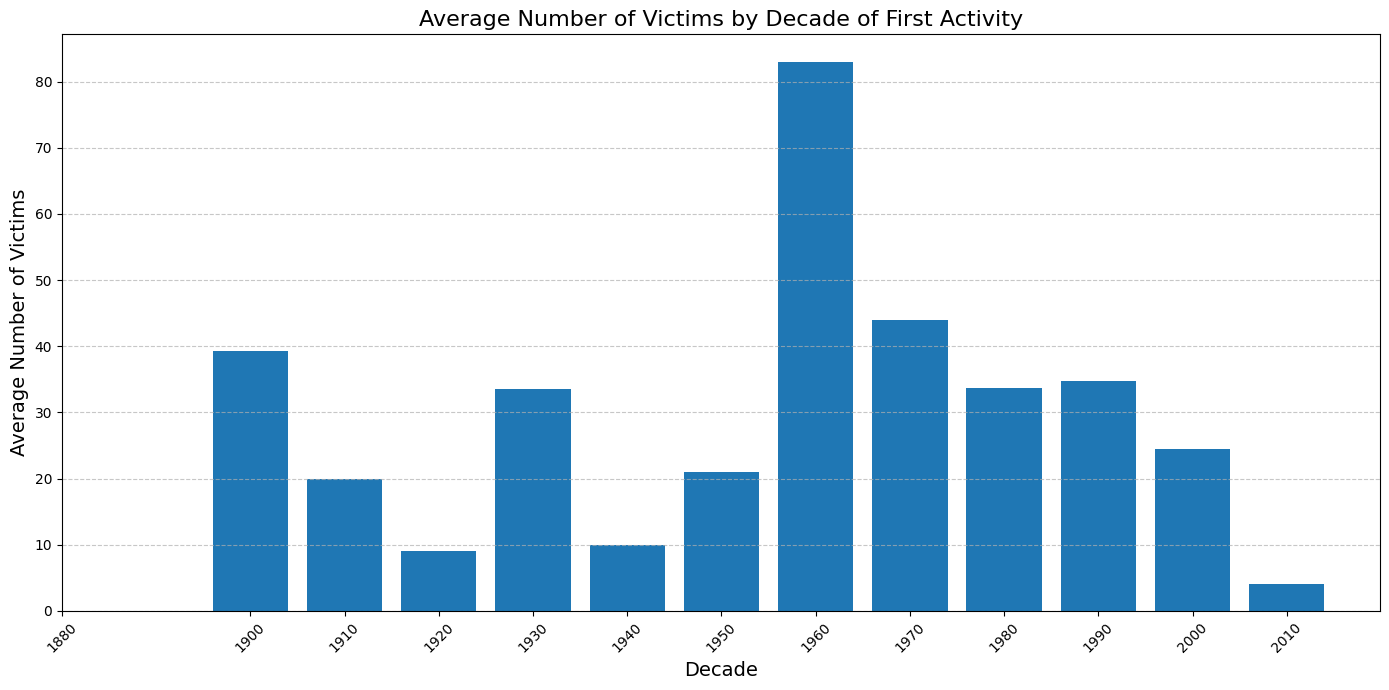

In [ ]:
# 2. VICTIM ANALYSIS
report += "\n## Victim Analysis\n\n"

if 'number_possible_victims' in df.columns:
    # Victim count statistics
    victims_stats = df['number_possible_victims'].describe().to_dict()

    report += f"### Victim Count Statistics\n"
    report += f"- Average victim count: {victims_stats['mean']:.1f}\n"
    report += f"- Median victim count: {victims_stats['50%']:.1f}\n"
    report += f"- Maximum victim count: {int(victims_stats['max'])}\n\n"

    # Graph: Victim count distribution
    plt.figure(figsize=(12, 6))
    # Cap at 50 victims for better visualization
    plt_data = df['number_possible_victims'].dropna().clip(upper=50)
    sns.histplot(plt_data, kde=True, bins=25)
    plt.title('Distribution of Victim Counts (capped at 50)', fontsize=16)
    plt.xlabel('Number of Victims', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    plt.close()

    report += f"![Victim Count Distribution](charts/victim_count_distribution.png)\n\n"

    # Graph: Victim count by decade
    if 'from_year' in df.columns:
        plt.figure(figsize=(14, 7))

        # Group by decade of first activity
        df['decade'] = (df['from_year'] // 10) * 10
        decade_victims = df.groupby('decade')['number_possible_victims'].mean().reset_index()

        plt.bar(decade_victims['decade'], decade_victims['number_possible_victims'], width=8)
        plt.title('Average Number of Victims by Decade of First Activity', fontsize=16)
        plt.xlabel('Decade', fontsize=14)
        plt.ylabel('Average Number of Victims', fontsize=14)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.xticks(decade_victims['decade'], rotation=45)
        plt.tight_layout()
        plt.show()
        plt.close()

        report += f"![Average Victims by Decade](charts/victims_by_decade.png)\n\n"

    # Check for more_victims_possible column
    if 'more_victims_possible' in df.columns:
        # Create pie chart of more_victims_possible
        plt.figure(figsize=(10, 10))
        more_victims_counts = df['more_victims_possible'].value_counts()
        plt.pie(more_victims_counts, labels=more_victims_counts.index, autopct='%1.1f%%',
                colors=sns.color_palette('pastel'), startangle=90, explode=[0.1, 0])
        plt.title('Cases with Potential Additional Victims', fontsize=16)
        plt.tight_layout()
        plt.savefig('data/charts/more_victims_possible_pie.png')
        plt.close()

        report += f"### Cases with Potential Additional Victims\n"
        total = len(df)
        yes_count = more_victims_counts.get('Yes', 0)
        report += f"- {yes_count} cases ({yes_count/total*100:.1f}%) likely have additional undiscovered victims\n\n"
        report += f"![More Victims Possible](charts/more_victims_possible_pie.png)\n\n"

        # Victims where more are possible vs. where not- wanted to show where more sk's were possible
        if 'number_possible_victims' in df.columns:
            plt.figure(figsize=(10, 6))
            sns.boxplot(x='more_victims_possible', y='number_possible_victims', data=df)
            plt.title('Victim Counts: Cases with More Possible vs. Confirmed Count', fontsize=16)
            plt.xlabel('More Victims Possible', fontsize=14)
            plt.ylabel('Number of Victims', fontsize=14)
            plt.grid(axis='y', linestyle='--', alpha=0.7)
            plt.tight_layout()
            plt.savefig('data/charts/victims_by_more_possible.png')
            plt.close()

            report += f"![Victims by More Possible](charts/victims_by_more_possible.png)\n\n"



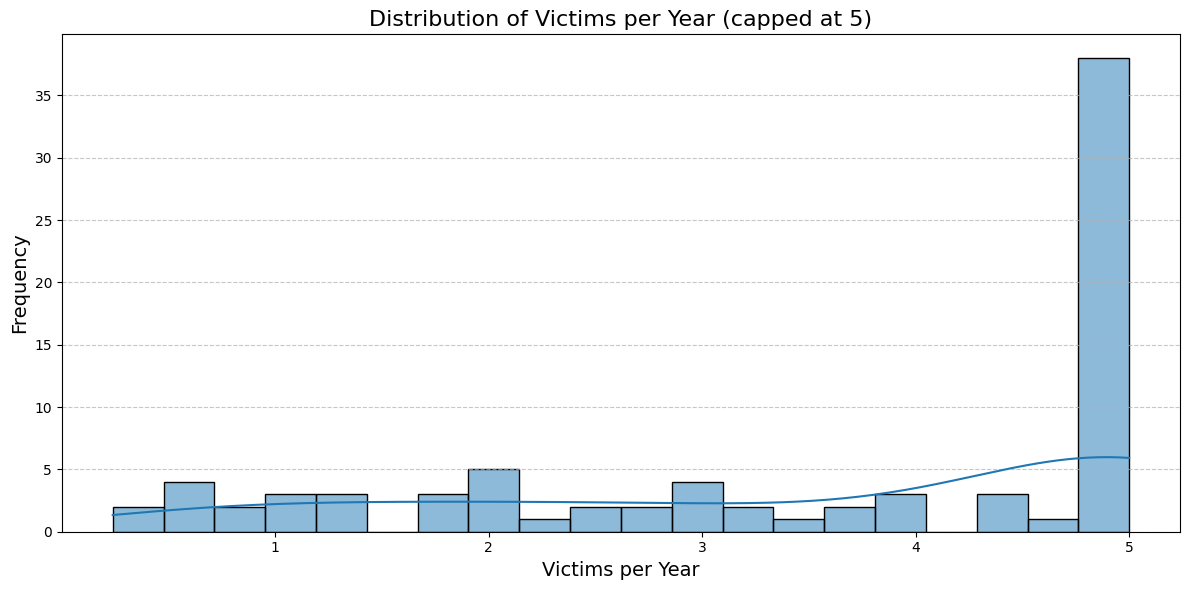

In [ ]:
# 3. EFFICIENCY ANALYSIS
if all(col in df.columns for col in ['number_possible_victims', 'active_duration']):
    report += "\n## Efficiency Analysis\n\n"

    # Calculated victims per year
    df['victims_per_year'] = df['number_possible_victims'] / df['active_duration']

    # Statistics
    vpy_stats = df['victims_per_year'].describe().to_dict()

    report += f"### Victims per Year Statistics\n"
    report += f"- Average victims per year: {vpy_stats['mean']:.2f}\n"
    report += f"- Median victims per year: {vpy_stats['50%']:.2f}\n"
    report += f"- Maximum victims per year: {vpy_stats['max']:.2f}\n\n"

    # Graph: Victims per year distribution- showcasing graph understanding
    plt.figure(figsize=(12, 6))
    sns.histplot(df['victims_per_year'].dropna().clip(upper=5), kde=True, bins=20)
    plt.title('Distribution of Victims per Year (capped at 5)', fontsize=16)
    plt.xlabel('Victims per Year', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    plt.close()

    report += f"![Victims per Year Distribution](charts/victims_per_year_distribution.png)\n\n"

    # Scatter plot: Activity duration vs. victim count
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(
        df['active_duration'],
        df['number_possible_victims'],
        c=df['victims_per_year'].clip(upper=5),
        cmap='viridis',
        alpha=0.7,
        s=50
    )
    plt.colorbar(scatter, label='Victims per Year (capped at 5)')
    plt.title('Activity Duration vs. Victim Count', fontsize=16)
    plt.xlabel('Activity Duration (Years)', fontsize=14)
    plt.ylabel('Number of Victims', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig('data/charts/duration_vs_victims_scatter.png')
    plt.close()

    report += f"![Duration vs Victims](charts/duration_vs_victims_scatter.png)\n\n"


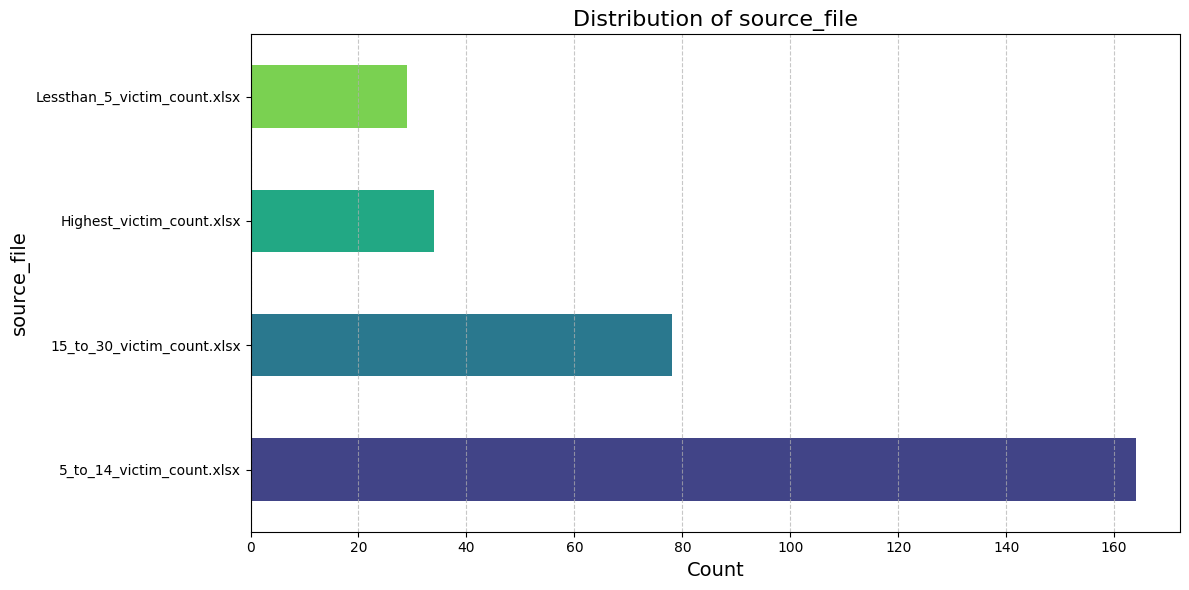

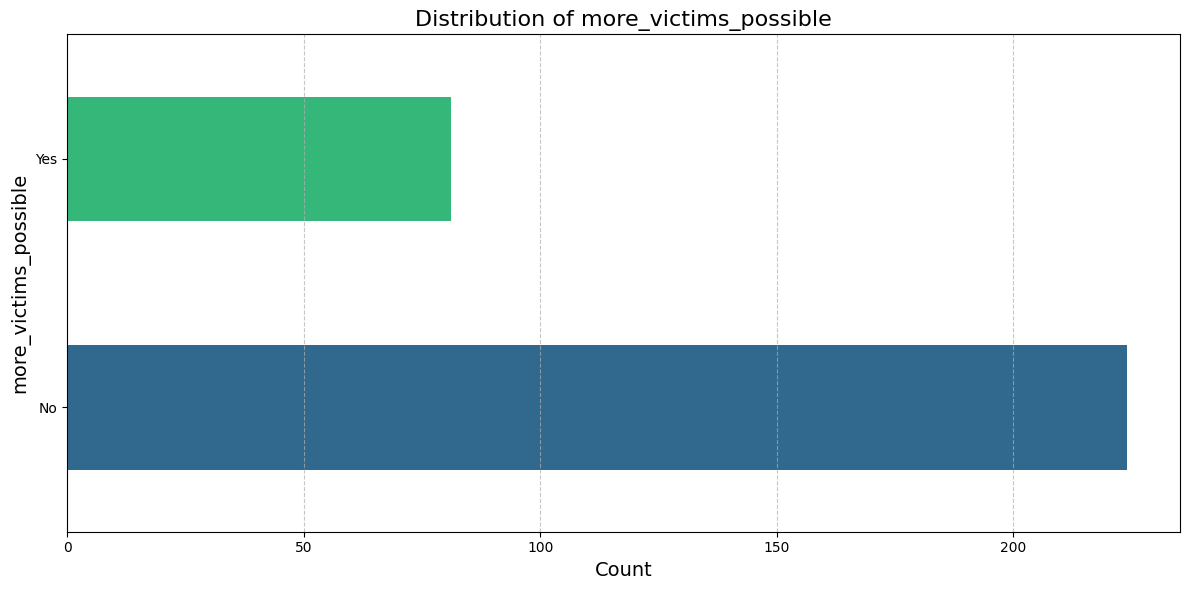

In [ ]:
# 4. CATEGORICAL ANALYSIS
report += "\n## Categorical Analysis\n\n"

# Identify potential categorical columns (avoiding the ones we shouldn't use)
categorical_cols = []
for col in df.columns:
    if col.lower() not in ['possible victims', 'years active']:
        if df[col].dtype == 'object' and df[col].nunique() <= 20 and df[col].nunique() > 1:
            categorical_cols.append(col)

report += f"### Identified {len(categorical_cols)} categorical variables for analysis\n\n"

# Process each categorical column
for col in categorical_cols[:5]:  # Limit to first 5 to avoid overwhelming report- want to keep this visually appealing
    # Count values
    value_counts = df[col].value_counts().nlargest(10)  # Top 10 values

    report += f"#### Analysis of '{col}'\n"
    report += f"- Total unique values: {df[col].nunique()}\n"
    report += f"- Top values:\n"

    for val, count in value_counts.items():
        report += f"  - {val}: {count} cases ({count/len(df)*100:.1f}%)\n"

    # Create bar chart- I like bar charts
    plt.figure(figsize=(12, max(6, min(10, value_counts.nunique()/2))))
    value_counts.plot(kind='barh', color=sns.color_palette('viridis', len(value_counts)))
    plt.title(f'Distribution of {col}', fontsize=16)
    plt.xlabel('Count', fontsize=14)
    plt.ylabel(col, fontsize=14)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    chart_filename = f'data/charts/{col.lower().replace(" ", "_")}_distribution.png'
    plt.show()
    plt.close()

    report += f"![{col} Distribution](charts/{os.path.basename(chart_filename)})\n\n"

    # If we have victim counts, analyze by this category
    if 'number_possible_victims' in df.columns:
        # Get top 5 categories for analysis
        top_categories = value_counts.nlargest(5).index.tolist()

        # Filter data for these categories
        cat_df = df[df[col].isin(top_categories)]

        plt.figure(figsize=(12, 8))
        sns.boxplot(x=col, y='number_possible_victims', data=cat_df)
        plt.title(f'Victim Counts by {col}', fontsize=16)
        plt.xlabel(col, fontsize=14)
        plt.ylabel('Number of Victims', fontsize=14)
        plt.xticks(rotation=45)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        chart_filename = f'data/charts/{col.lower().replace(" ", "_")}_victims_boxplot.png'
        plt.savefig(chart_filename)
        plt.close()

        report += f"![{col} Victims Boxplot](charts/{os.path.basename(chart_filename)})\n\n"


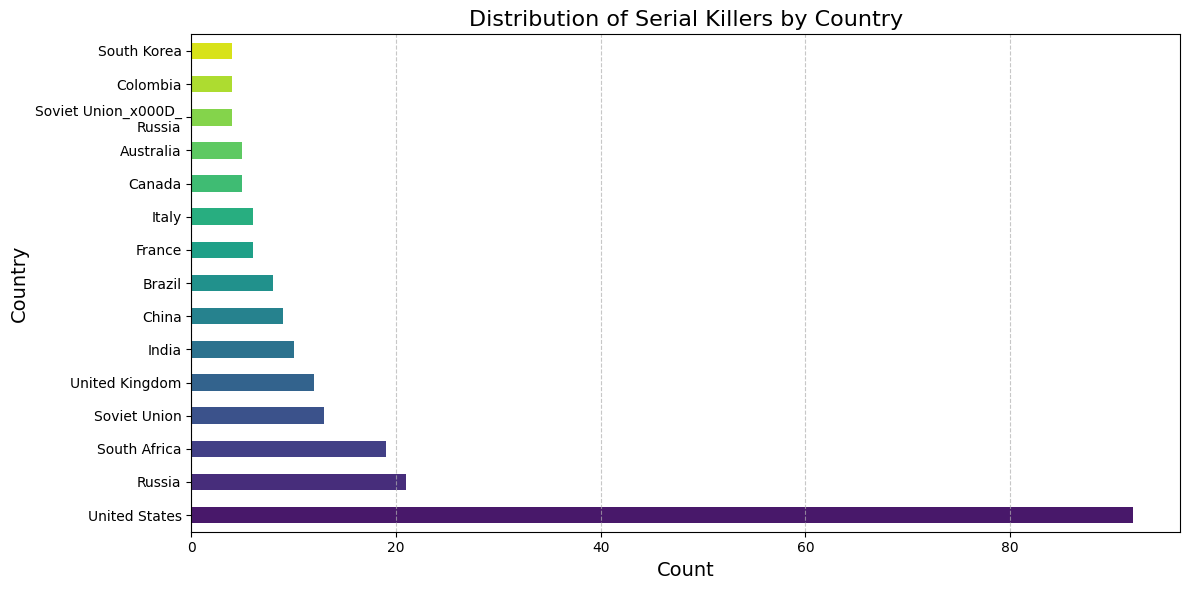

In [7]:
# 5. GEOGRAPHIC ANALYSIS
# Look for country or location columns
geo_cols = [col for col in df.columns if any(term in col.lower() for term in ['country', 'location', 'region', 'state', 'city'])]

if geo_cols:
    report += "\n## Geographic Analysis\n\n"

    for geo_col in geo_cols[:2]:  # Limit to first 2 geographic columns
        # Count values
        geo_counts = df[geo_col].value_counts().nlargest(15)  # Top 15 locations

        report += f"### Analysis by {geo_col}\n"
        report += f"- Total unique locations: {df[geo_col].nunique()}\n"
        report += f"- Top locations:\n"

        for val, count in geo_counts.items():
            report += f"  - {val}: {count} cases ({count/len(df)*100:.1f}%)\n"

        # Create bar chart
        plt.figure(figsize=(12, max(6, min(10, geo_counts.nunique()/2))))
        geo_counts.plot(kind='barh', color=sns.color_palette('viridis', len(geo_counts)))
        plt.title(f'Distribution of Serial Killers by {geo_col}', fontsize=16)
        plt.xlabel('Count', fontsize=14)
        plt.ylabel(geo_col, fontsize=14)
        plt.grid(axis='x', linestyle='--', alpha=0.7)
        plt.tight_layout()
        chart_filename = f'data/charts/{geo_col.lower().replace(" ", "_")}_distribution.png'
        plt.show()
        plt.close()

        report += f"![{geo_col} Distribution](charts/{os.path.basename(chart_filename)})\n\n"

        # If we have victim counts, analyze by this geographic variable
        if 'number_possible_victims' in df.columns:
            # Get top 5 locations for analysis
            top_locations = geo_counts.nlargest(5).index.tolist()

            # Filter data for these locations
            geo_df = df[df[geo_col].isin(top_locations)]

            plt.figure(figsize=(12, 8))
            sns.boxplot(x=geo_col, y='number_possible_victims', data=geo_df)
            plt.title(f'Victim Counts by {geo_col}', fontsize=16)
            plt.xlabel(geo_col, fontsize=14)
            plt.ylabel('Number of Victims', fontsize=14)
            plt.xticks(rotation=45)
            plt.grid(axis='y', linestyle='--', alpha=0.7)
            plt.tight_layout()
            chart_filename = f'data/charts/{geo_col.lower().replace(" ", "_")}_victims_boxplot.png'
            plt.savefig(chart_filename)
            plt.close()

            report += f"![{geo_col} Victims Boxplot](charts/{os.path.basename(chart_filename)})\n\n"


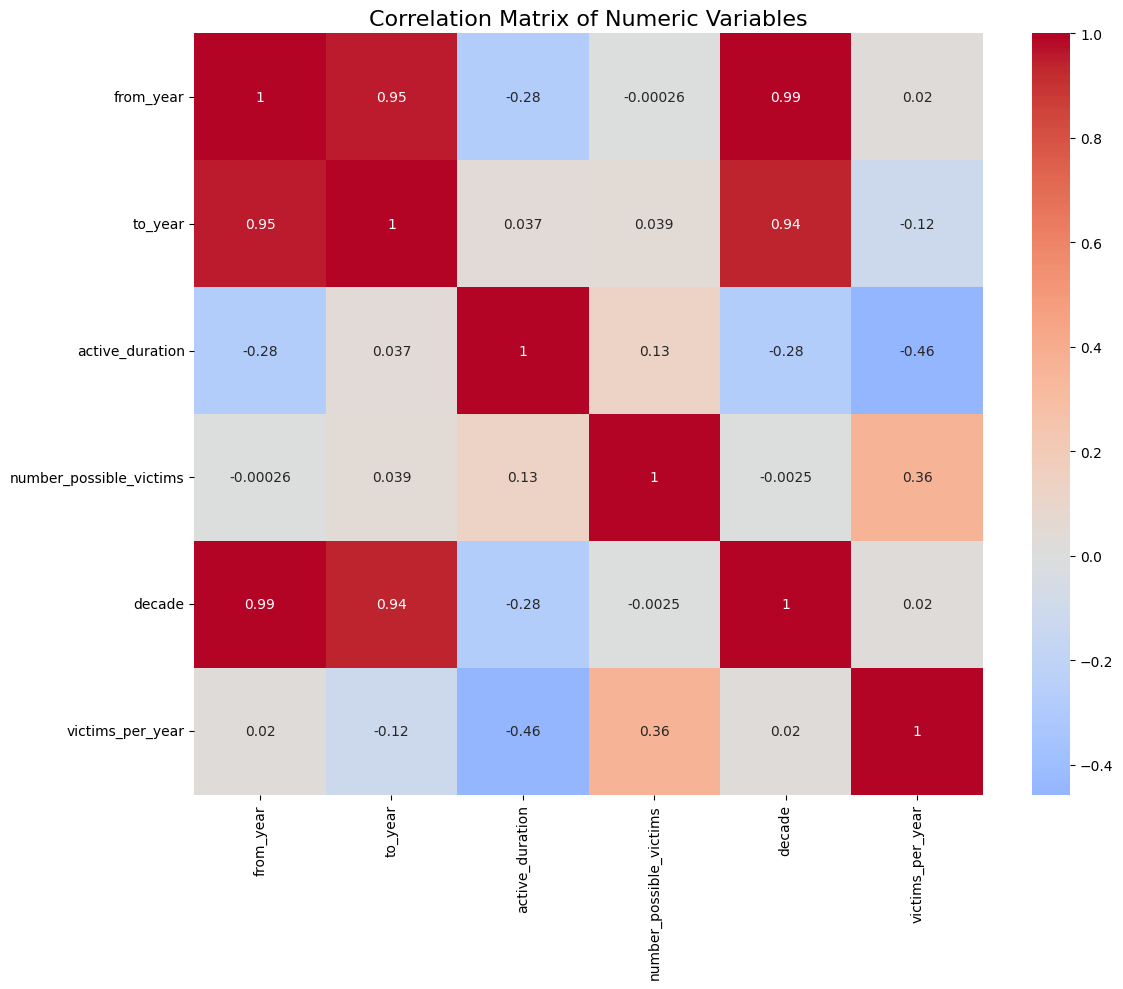

In [17]:
# 6. CORRELATION ANALYSIS
report += "\n## Correlation Analysis\n\n"

# Get numeric columns for correlation analysis
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

# Remove certain columns we shouldn't use
numeric_cols = [col for col in numeric_cols if col.lower() not in ['possible victims', 'years active']]

if len(numeric_cols) >= 2:
    plt.figure(figsize=(12, 10))
    corr_matrix = df[numeric_cols].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix of Numeric Variables', fontsize=16)
    plt.tight_layout()
    plt.show()
    plt.close()

    report += f"### Correlation Matrix\n"
    report += f"![Correlation Matrix](charts/correlation_matrix.png)\n\n"

    # Highlight strongest correlations
    corr_pairs = []
    for i in range(len(numeric_cols)):
        for j in range(i+1, len(numeric_cols)):
            corr_value = corr_matrix.iloc[i, j]
            if not np.isnan(corr_value):
                corr_pairs.append((numeric_cols[i], numeric_cols[j], corr_value))

    # Sort by absolute correlation
    corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)

    report += "### Strongest Correlations\n"
    for var1, var2, corr in corr_pairs[:5]:
        report += f"- {var1} and {var2}: {corr:.3f}\n"
    report += "\n"


In [7]:
# 7. SUMMARY STATISTICS TABLE
report += "\n## Summary Statistics Tables\n\n"

# Summary stats for numeric columns
numeric_summary = df.describe().transpose()

# Format summary as markdown table
report += "### Numeric Variables\n\n"
report += "| Variable | Count | Mean | Std | Min | 25% | Median | 75% | Max |\n"
report += "| --- | --- | --- | --- | --- | --- | --- | --- | --- |\n"

for idx, row in numeric_summary.iterrows():
    if idx.lower() not in ['possible victims', 'years active']:
        report += f"| {idx} | {int(row['count'])} | {row['mean']:.2f} | {row['std']:.2f} | {row['min']:.2f} | {row['25%']:.2f} | {row['50%']:.2f} | {row['75%']:.2f} | {row['max']:.2f} |\n"

# Save the report to a markdown file
report_file = 'data/reports/serial_killer_analysis.md'
with open(report_file, 'w') as f:
    f.write(report)

print(f"Analysis complete! Report saved to {report_file}")
print(f"Generated {len(os.listdir('data/charts'))} charts in data/charts/ directory")

SyntaxError: 'return' outside function (3112769727.py, line 303)